In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import e3_fullgts_merge_regimes as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
ddf = dict()
for pidx in [1, 2, 3]:

    df = pd.read_csv(parent_script.out_dir + f'pv_fullgts_trajectory_p{pidx}.csv', index_col = 0)
    print(df.shape)
    print(pidx)
    ddf[pidx] = df

(13841, 36)
1
(13841, 36)
2
(13841, 36)
3


## truncate stats

In [3]:
df = ddf[2]

df['Max'] = df.apply('max', axis = 'columns')

thresholds = [0.10, 0.05, 0.04, 0.03, 0.02, 0.01]

for threshold in thresholds:
    n = sum(df['Max'] > threshold)
    print(f'Above {threshold:.0%}: {n} genotypes')

Above 10%: 3 genotypes
Above 5%: 10 genotypes
Above 4%: 17 genotypes
Above 3%: 29 genotypes
Above 2%: 51 genotypes
Above 1%: 98 genotypes


## plot truncated

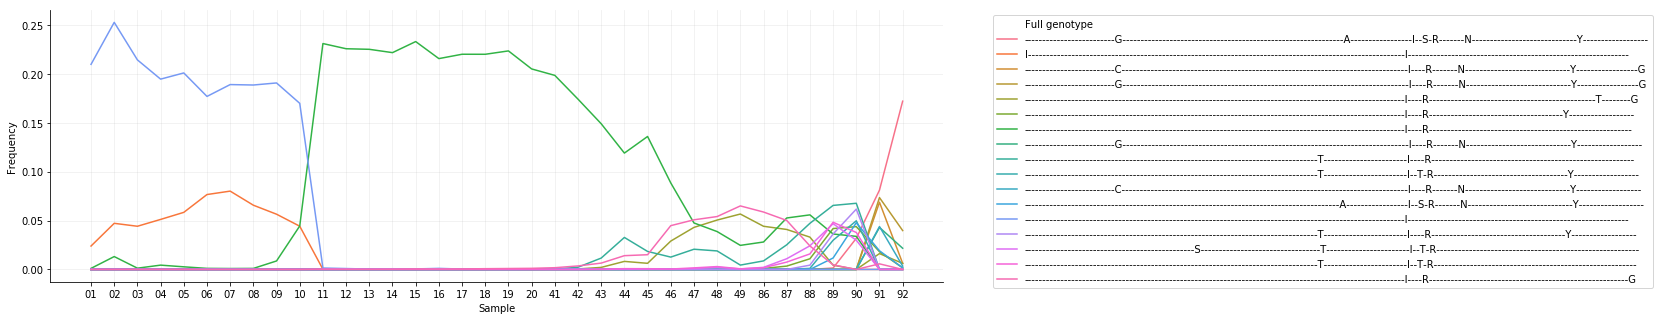

In [11]:
df = ddf[2]
df['Max'] = df.apply('max', axis = 'columns')

threshold = 0.04

df3 = df[df['Max'] > threshold]

df3 = df3.drop(['Max'], axis = 'columns')
df3['Full genotype'] = df3.index
# df3 = df3.set_index('Full genotype')
# df3 = df3.div(df3.sum(axis = 'rows'), axis = 'columns')
# df3 = df3.reset_index()
dfm3 = df3

dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

# Shuffle rows for random colors
dfm3 = dfm3.sample(frac = 1)
dfm3['Sample'] = [str(s).zfill(2) for s in dfm3['Sample']]

fig, ax = plt.subplots(figsize = (16, 5))
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm3,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

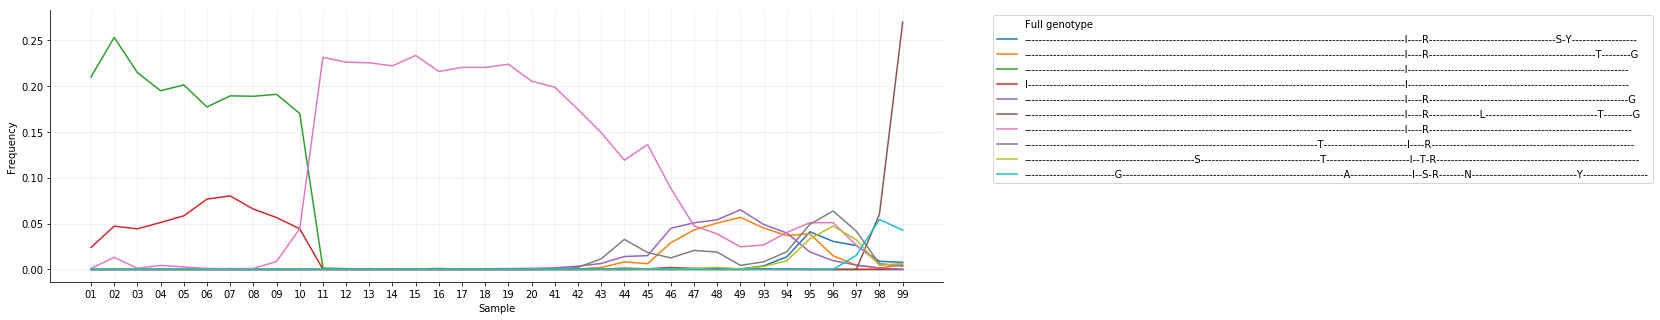

In [13]:
df = ddf[3]
df['Max'] = df.apply('max', axis = 'columns')

threshold = 0.04

df3 = df[df['Max'] > threshold]

df3 = df3.drop(['Max'], axis = 'columns')
df3['Full genotype'] = df3.index
# df3 = df3.set_index('Full genotype')
# df3 = df3.div(df3.sum(axis = 'rows'), axis = 'columns')
# df3 = df3.reset_index()
dfm3 = df3

dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

# Shuffle rows for random colors
dfm3 = dfm3.sample(frac = 1)
dfm3['Sample'] = [str(s).zfill(2) for s in dfm3['Sample']]

fig, ax = plt.subplots(figsize = (16, 5))
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm3,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

## Plot PACE only

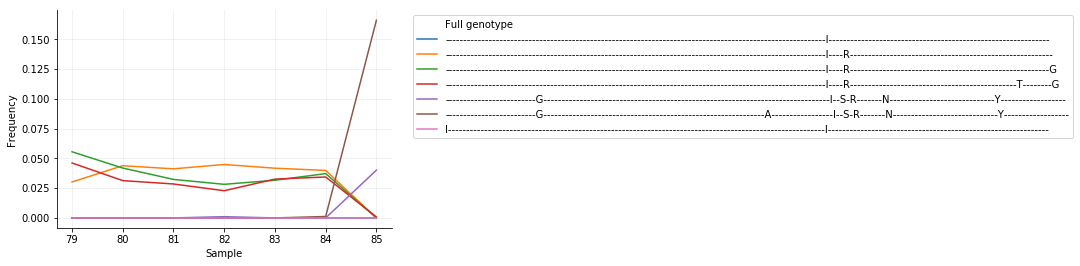

In [17]:
df = ddf[1]
df['Max'] = df.apply('max', axis = 'columns')

threshold = 0.04

df3 = df[df['Max'] > threshold]

df3 = df3.drop(['Max'], axis = 'columns')
df3['Full genotype'] = df3.index
# df3 = df3.set_index('Full genotype')
# df3 = df3.div(df3.sum(axis = 'rows'), axis = 'columns')
# df3 = df3.reset_index()
dfm3 = df3

dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

crit = (dfm3['Sample'] >= 79) & (dfm3['Sample'] <= 99)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

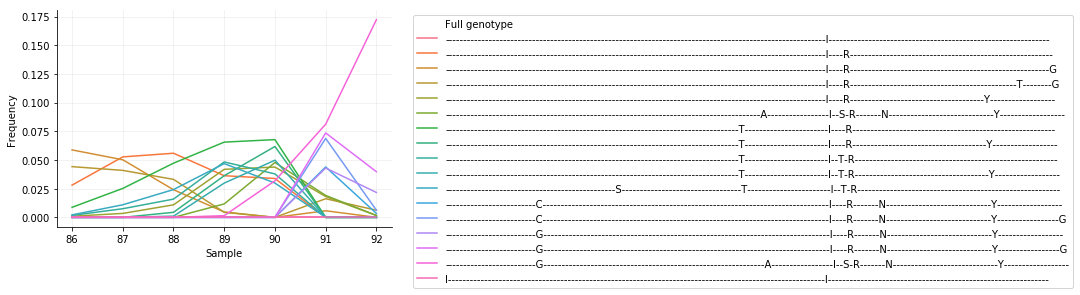

In [16]:
df = ddf[2]
df['Max'] = df.apply('max', axis = 'columns')

threshold = 0.04

df3 = df[df['Max'] > threshold]

df3 = df3.drop(['Max'], axis = 'columns')
df3['Full genotype'] = df3.index
# df3 = df3.set_index('Full genotype')
# df3 = df3.div(df3.sum(axis = 'rows'), axis = 'columns')
# df3 = df3.reset_index()
dfm3 = df3

dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

crit = (dfm3['Sample'] >= 79) & (dfm3['Sample'] <= 99)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

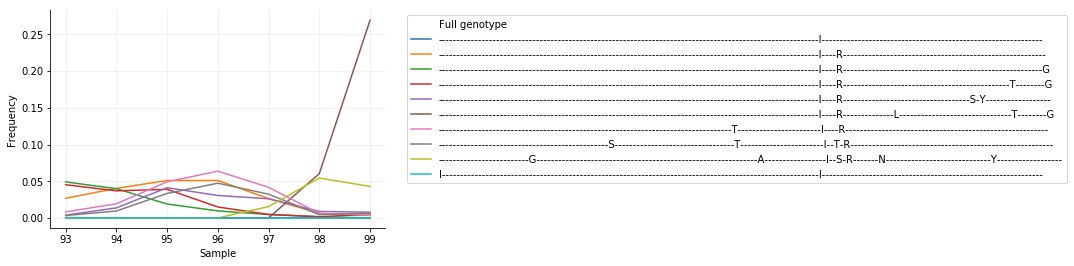

In [15]:
df = ddf[3]
df['Max'] = df.apply('max', axis = 'columns')

threshold = 0.04

df3 = df[df['Max'] > threshold]

df3 = df3.drop(['Max'], axis = 'columns')
df3['Full genotype'] = df3.index
# df3 = df3.set_index('Full genotype')
# df3 = df3.div(df3.sum(axis = 'rows'), axis = 'columns')
# df3 = df3.reset_index()
dfm3 = df3

dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

crit = (dfm3['Sample'] >= 79) & (dfm3['Sample'] <= 99)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')